# linear transformation



In [45]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
def plot_vec(vec, origin=[0,0], **options):
    return plt.arrow(origin[0], origin[1], vec[0], vec[1], head_width=0.3, head_length=0.3, length_includes_head=True, **options)

# matriks standar untuk pencerminan

![matriks standar untuk pencnerminan](./Screen%20Shot%202022-10-11%20at%2012.49.17.png)

In [47]:
# matriks standar pencerminan (refleksi) ke kiri.
Tr=np.array([[-1,0],[0,1]])
Tr

array([[-1,  0],
       [ 0,  1]])

In [48]:
a = np.array([1,2])
a

array([1, 2])

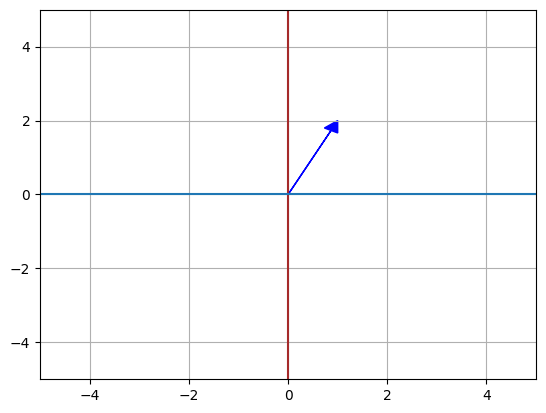

In [49]:
plot_vec(a,color='blue')
plt.plot([0,0], [-5,5], color='brown')
plt.axis([-5,5,-5,5])
plt.axhline(0,0)
plt.grid()

array([-1,  2])

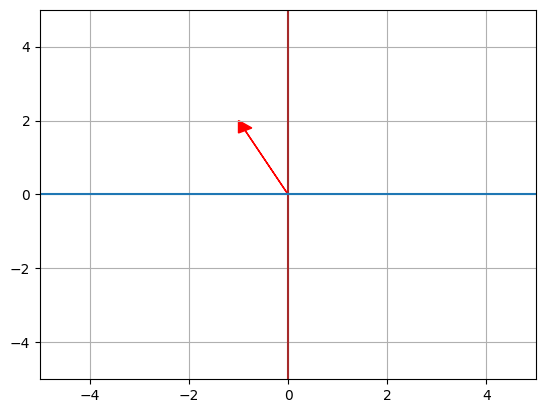

In [50]:
display(a@Tr) # PENTING: BUKAN DOT PRODUCT TAPI MATRIX MULTIPLICATION
plot_vec(a@Tr,color='red')
plt.plot([0,0], [-5,5], color='brown')
plt.axis([-5,5,-5,5])
plt.axhline(0,0)
plt.grid()

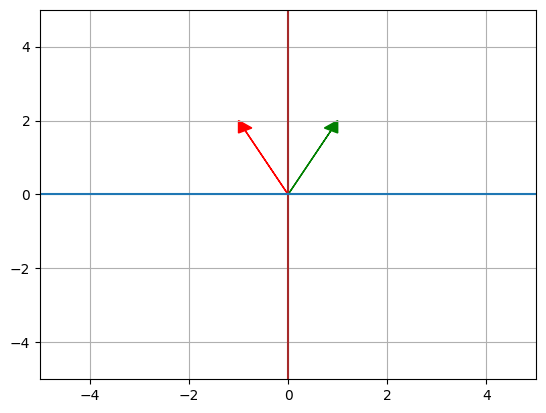

In [51]:
plot_vec(a, color='green')
plot_vec(a@Tr,color='red')
plt.plot([0,0], [-5,5], color='brown')
plt.axis([-5,5,-5,5])
plt.axhline(0,0)
plt.grid()

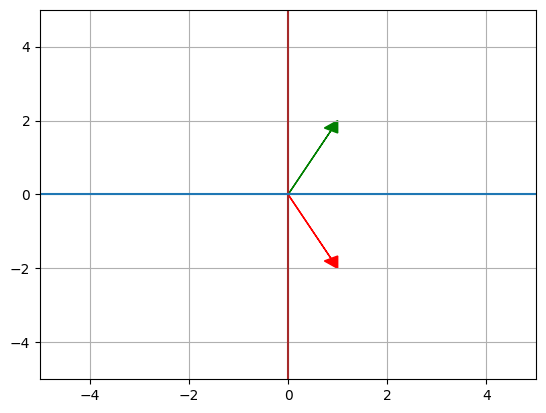

In [52]:
# Tr1 = [[-1,0]  <= mengubah x menjadi -
#        [0,-1]]
# Tr2 = [[1,0]
#        [0,-1]] <= mengubah y menjadi -
Tr2 = np.array([[1,0],[0,-1]])
plot_vec(a, color='green')
plot_vec(a@Tr2,color='red')
plt.plot([0,0], [-5,5], color='brown')
plt.axis([-5,5,-5,5])
plt.axhline(0,0)
plt.grid()

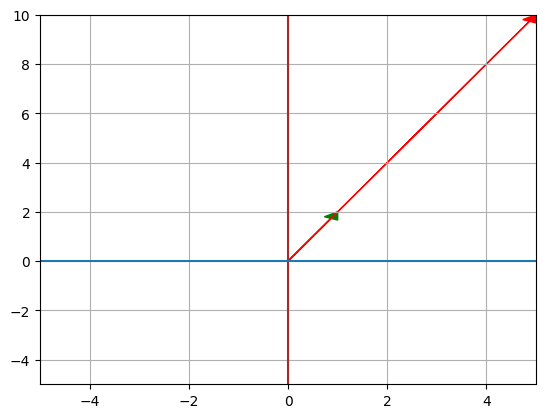

In [53]:
T = np.array([[1,2], [2,4]])
plot_vec(a, color='green')
# hanya perubahan panjang (tidak terjadi perubahan arah) karena
# T(a) = [5,10] = 5[1,2] = 5a
plot_vec(T@a,color='red') 
plt.plot([0,0], [-5,10], color='brown')
plt.axis([-5,5,-5,10])
plt.axhline(0,0)
plt.grid()

# EIGEN VALUE & EIGEN VECTOR

1. Eigen vector == SCALING TANPA PERUBAHAN ARAH / ROTASI (seperti contoh di atas `a = np.array([1,2])`)
2. Nilai Eigen == scaling berapa kali? (seperti contoh di ata, 5a, berarti nilainya 5)

```
eigen vector = x
eigen value = λ
```

Ax = λx

```
A = [ a b ]
    [ c d ]
det(A) = ad - bc
```

![eigen formula](./Screen%20Shot%202022-10-11%20at%2013.36.01.png)

![eigen](./Screen%20Shot%202022-10-11%20at%2019.23.22.png)

![cara cari lambda](./Screen%20Shot%202022-10-11%20at%2018.53.47.png)

In [54]:
A = np.array([[1,2], [2,4]])
A

array([[1, 2],
       [2, 4]])

In [55]:
display(np.linalg.eig(A))
eig_val, vec_eig = np.linalg.eig(A)

(array([0., 5.]),
 array([[-0.89442719, -0.4472136 ],
        [ 0.4472136 , -0.89442719]]))

In [56]:
eig_val

array([0., 5.])

In [57]:
vec_eig # normalized eigen vector

array([[-0.89442719, -0.4472136 ],
       [ 0.4472136 , -0.89442719]])

In [58]:
display(np.array([-1,-2])/np.sqrt(5))
display(vec_eig[0]*np.sqrt(eig_val[0]))
display(vec_eig[1]*np.sqrt(eig_val[1]))

array([-0.4472136 , -0.89442719])

array([-0., -0.])

array([ 1., -2.])

RECONSTRUCT MATRIX

![reconstruct matrix](./Screen%20Shot%202022-10-11%20at%2010.50.04.png)

In [59]:
rec = vec_eig @ np.diag(eig_val) @ np.linalg.inv(vec_eig)
rec

array([[1., 2.],
       [2., 4.]])

Implementasi - Sosmed Network (Twitter)

![diretweet siapa?](./Screen%20Shot%202022-10-11%20at%2011.04.44.png)


B diRT oleh A, D, F

In [60]:
M = np.array([
    #A  ,B  ,C,D  ,E,F
    [0  ,1/4,0,1/2,0,0],   #A -> B diRT oleh A
    [0  ,0  ,0,0  ,0,0],   #B
    [1/2,1/4,0,0  ,0,1/2],   #C -> B diRT oleh C
    [1/2,1/4,0,0  ,0,1/2],   #D -> B diRT oleh D
    [0  ,1/4,0,1/2,0,0], #E -> B diRT oleh E
    [0  ,0  ,0,0  ,0,0],   #F
])

In [61]:
e_value, vector_e = np.linalg.eig(M)

In [62]:
e_value

array([ 0. ,  0. ,  0.5, -0.5,  0. ,  0. ])

In [63]:
vector_e

array([[ 0.00000000e+000,  0.00000000e+000,  5.00000000e-001,
        -5.00000000e-001, -2.55878898e-276, -2.29441643e-276],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
         0.00000000e+000,  5.11757796e-276,  0.00000000e+000],
       [ 0.00000000e+000,  1.00000000e+000,  5.00000000e-001,
         5.00000000e-001,  5.27160038e-001,  2.98392024e-001],
       [ 0.00000000e+000,  0.00000000e+000,  5.00000000e-001,
         5.00000000e-001, -2.55878898e-276,  1.07930590e-291],
       [ 1.00000000e+000,  0.00000000e+000,  5.00000000e-001,
        -5.00000000e-001, -8.49766023e-001, -9.54443398e-001],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
         0.00000000e+000,  0.00000000e+000,  2.29441643e-276]])

**PERHATIAN: np.argmax return INDEX**

In [64]:
np.argmax(e_value)

2

```
array([[ 0.00000000e+000,  0.00000000e+000,  5.00000000e-001,
        -5.00000000e-001, -2.55878898e-276, -2.29441643e-276],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
         0.00000000e+000,  5.11757796e-276,  0.00000000e+000],
                A        (B yang paling besar)     C
                |                |                 |
                v                v                 v
       [ 0.00000000e+000,  1.00000000e+000,  5.00000000e-001,       => pilih ini berdasarkan np.argmax(e_value)
         5.00000000e-001,  5.27160038e-001,  2.98392024e-001],
       [ 0.00000000e+000,  0.00000000e+000,  5.00000000e-001,
         5.00000000e-001, -2.55878898e-276,  1.07930590e-291],
       [ 1.00000000e+000,  0.00000000e+000,  5.00000000e-001,
        -5.00000000e-001, -8.49766023e-001, -9.54443398e-001],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
         0.00000000e+000,  0.00000000e+000,  2.29441643e-276]])
```

In [65]:
np.argmax(vector_e[2])

1